In [1]:
import os
import matplotlib.pyplot as plt
import hashlib
from collections import defaultdict
import shutil
import random
from PIL import Image

Number of images in 'basophil': 1000
Number of images in 'erythroblast': 1000
Number of images in 'monocyte': 1000
Number of images in 'myeloblast': 1000
Number of images in 'seg_neutrophil': 1000


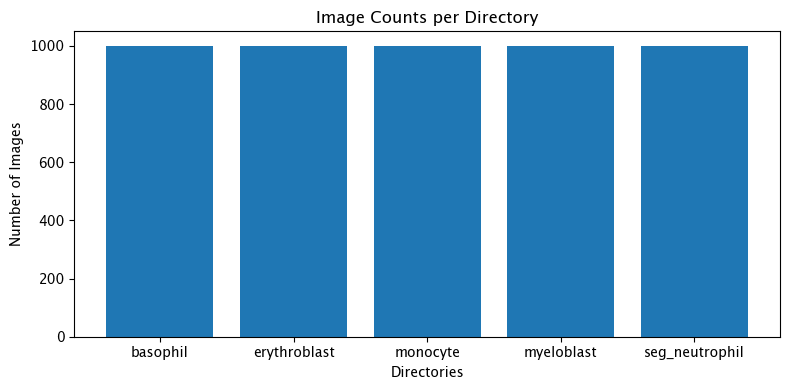

In [2]:
# Original dataset folders
directories = ['basophil', 'erythroblast', 'monocyte', 'myeloblast', 'seg_neutrophil']
image_extensions = ('.jpg','jpeg')
counts = []

# count number of images
for directory in directories:
    try:
        image_count = sum(
            1 for filename in os.listdir(directory)
            if filename.lower().endswith(image_extensions)
        )
        counts.append(image_count)
        print(f"Number of images in '{directory}': {image_count}")
    except FileNotFoundError:
        counts.append(0)
        print(f"Directory '{directory}' not found.")

# Bar chart
plt.figure(figsize=(8, 4))
plt.bar(directories, counts)
plt.xlabel('Directories')
plt.ylabel('Number of Images')
plt.title('Image Counts per Directory')
plt.tight_layout()
plt.show()

In [3]:
# Original dataset folders
directories = ['basophil', 'erythroblast', 'monocyte', 'myeloblast', 'seg_neutrophil']
image_extensions = ('.jpg','jpeg')

def file_hash(filepath):
    hash_md5 = hashlib.md5()
    with open(filepath, "rb") as f:
        for chunk in iter(lambda: f.read(4096), b""):
            hash_md5.update(chunk)
    return hash_md5.hexdigest()

# Storing hash values to see files with same hash values
hash_dict = {}

# Scan all directories and group them by hash values
for directory in directories:
    if not os.path.exists(directory):
        print(f"Directory '{directory}' not found.")
        continue

    for filename in os.listdir(directory):
        if filename.lower().endswith(image_extensions):
            filepath = os.path.join(directory, filename)
            h = file_hash(filepath)
            hash_dict.setdefault(h, []).append(filepath)

# Delete duplicates
duplicates_found = False
deleted_count_by_dir = defaultdict(int)

for h, files in hash_dict.items():
    if len(files) > 1:
        duplicates_found = True
        original = files[0]
        duplicates = files[1:]
        print(f"\nKeeping original: {original}")
        for f in duplicates:
            try:
                os.remove(f)
                deleted_count_by_dir[os.path.dirname(f)] += 1
                print(f"Deleted duplicate: {f}")
            except Exception as e:
                print(f"Could not delete {f}: {e}")

if duplicates_found:
    print("\nDuplicate deletion summary:")
    for directory, count in deleted_count_by_dir.items():
        print(f"Directory '{directory}': {count} file(s) deleted")
    print(f"\nTotal duplicates deleted: {sum(deleted_count_by_dir.values())}")
else:
    print("\nNo duplicate images found.")



Keeping original: basophil/BA_988506.jpg
Deleted duplicate: basophil/BA_251042.jpg

Keeping original: basophil/BA_381452.jpg
Deleted duplicate: basophil/BA_80990.jpg

Keeping original: basophil/BA_546746.jpg
Deleted duplicate: basophil/BA_685720.jpg

Keeping original: basophil/BA_435917.jpg
Deleted duplicate: basophil/BA_858229.jpg

Keeping original: basophil/BA_786369.jpg
Deleted duplicate: basophil/BA_225540.jpg

Keeping original: monocyte/MO_997225.jpg
Deleted duplicate: monocyte/MO_145357.jpg

Duplicate deletion summary:
Directory 'basophil': 5 file(s) deleted
Directory 'monocyte': 1 file(s) deleted

Total duplicates deleted: 6


In [4]:
# Original dataset folders
classes = ['basophil', 'erythroblast', 'monocyte', 'myeloblast', 'seg_neutrophil']

# Split ratios
train_ratio = 0.7
val_ratio = 0.2
test_ratio = 0.1

# Output folder
output_base = 'dataset_split'

# Image extensions
image_extensions = ('.jpg', '.jpeg')

# Creating the split folders
for split in ['train', 'val', 'test']:
    for cls in classes:
        os.makedirs(os.path.join(output_base, split, cls), exist_ok=True)

# Process each class images
for cls in classes:
    image_dir = cls 
    images = [f for f in os.listdir(image_dir) if f.lower().endswith(image_extensions)]
    random.seed(12)
    random.shuffle(images)

    total = len(images)
    train_count = int(total * train_ratio)
    val_count = int(total * val_ratio)
    test_count = total - train_count - val_count

    splits = {
        'train': images[:train_count],
        'val': images[train_count:train_count + val_count],
        'test': images[train_count + val_count:]
    }

    # Copying files to the output folder
    for split, split_files in splits.items():
        for file in split_files:
            src_path = os.path.join(image_dir, file)
            dst_path = os.path.join(output_base, split, cls, file)
            shutil.copy2(src_path, dst_path)

print("Dataset split completed successfully.")


Dataset split completed successfully.


In [5]:
# Define base directory and class names
base_dir = 'dataset_split'
splits = ['train', 'val', 'test']
classes = ['basophil', 'erythroblast', 'monocyte', 'myeloblast', 'seg_neutrophil']

# Define image file extensions
image_extensions = ('.jpg', 'jpeg')

# Count images
for split in splits:
    print(f"\n {split.upper()} SET")
    total = 0
    for cls in classes:
        folder = os.path.join(base_dir, split, cls)
        if os.path.exists(folder):
            count = sum(
                1 for f in os.listdir(folder)
                if f.lower().endswith(image_extensions)
            )
            print(f"    {cls}: {count} images")
            total += count
        else:
            print( f"{cls}: directory not found.")
    print(f"    Total in {split}: {total} images")



 TRAIN SET
    basophil: 696 images
    erythroblast: 700 images
    monocyte: 699 images
    myeloblast: 700 images
    seg_neutrophil: 700 images
    Total in train: 3495 images

 VAL SET
    basophil: 199 images
    erythroblast: 200 images
    monocyte: 199 images
    myeloblast: 200 images
    seg_neutrophil: 200 images
    Total in val: 998 images

 TEST SET
    basophil: 100 images
    erythroblast: 100 images
    monocyte: 101 images
    myeloblast: 100 images
    seg_neutrophil: 100 images
    Total in test: 501 images



 TRAIN SET
    basophil: 696 images
    erythroblast: 700 images
    monocyte: 699 images
    myeloblast: 700 images
    seg_neutrophil: 700 images
    Total in train: 3495 images

 VAL SET
    basophil: 199 images
    erythroblast: 200 images
    monocyte: 199 images
    myeloblast: 200 images
    seg_neutrophil: 200 images
    Total in val: 998 images

 TEST SET
    basophil: 100 images
    erythroblast: 100 images
    monocyte: 101 images
    myeloblast: 100 images
    seg_neutrophil: 100 images
    Total in test: 501 images


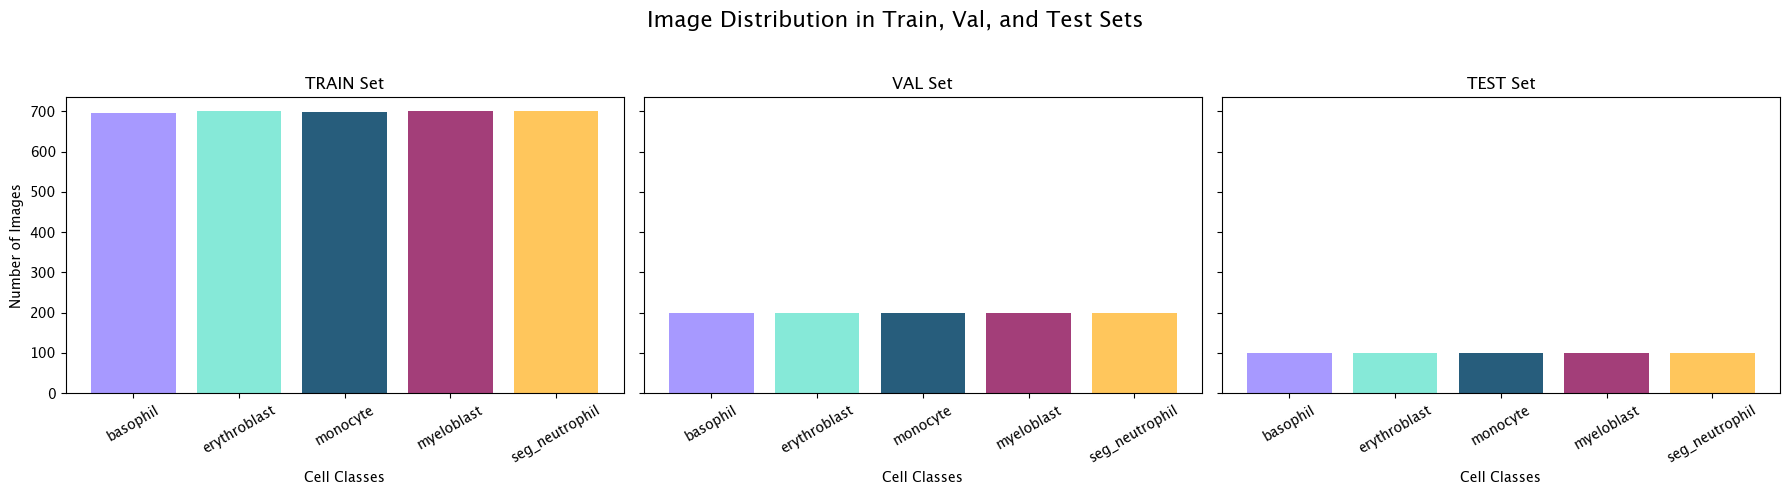

In [6]:
# Bar plot colours
dark_colors = [
    '#A799FF',  
    '#86E9D8',  
    '#275D7C',  
    '#A33E79',  
    '#FFC65C'  
]

split_counts = {}

# Count images
for split in splits:
    print(f"\n {split.upper()} SET")
    counts = []
    total = 0
    for cls in classes:
        folder = os.path.join(base_dir, split, cls)
        if os.path.exists(folder):
            count = sum(
                1 for f in os.listdir(folder)
                if f.lower().endswith(image_extensions)
            )
            print(f"    {cls}: {count} images")
            total += count
            counts.append(count)
        else:
            print(f" {cls}: directory not found.")
            counts.append(0)
    print(f"    Total in {split}: {total} images")
    split_counts[split] = counts

fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

for i, split in enumerate(splits):
    axes[i].bar(classes, split_counts[split], color=dark_colors)
    axes[i].set_title(f"{split.upper()} Set")
    axes[i].set_xlabel("Cell Classes")
    if i == 0:
        axes[i].set_ylabel("Number of Images")
    axes[i].tick_params(axis='x', rotation=30)

plt.suptitle("Image Distribution in Train, Val, and Test Sets", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()



 Showing one random image per class


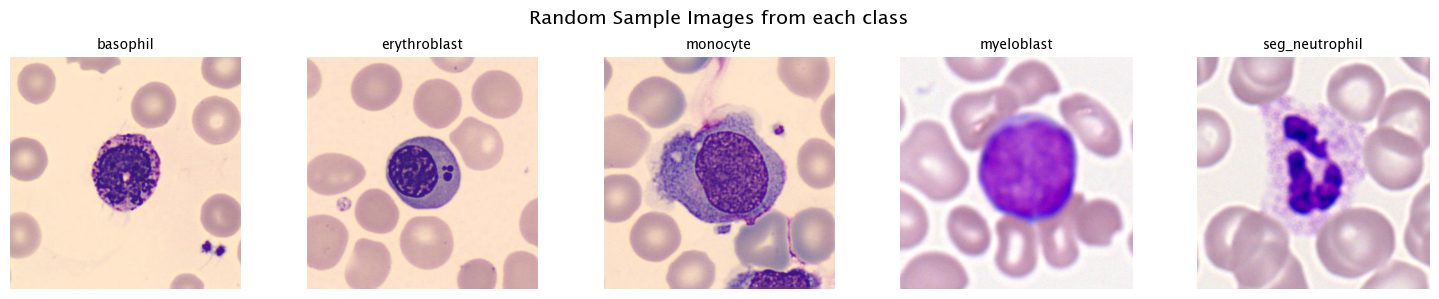

In [8]:
# Displaying random images present in train folder 
splits = ["train"]

def show_one_image_per_class(base_dir, split, classes):
    print(f"\n Showing one random image per class")
    
    fig, axes = plt.subplots(1, len(classes), figsize=(15, 3))
    fig.suptitle(f"Random Sample Images from each class", fontsize=14)
    
    for idx, cls in enumerate(classes):
        folder = os.path.join(base_dir, split, cls)
        if not os.path.exists(folder):
            print(f" Class '{cls}' not found in {split}")
            axes[idx].axis("off")
            continue
        
        images = os.listdir(folder)
        if len(images) == 0:
            print(f" No images found for class '{cls}' in {split}")
            axes[idx].axis("off")
            continue
        
        img_file = random.choice(images)
        img_path = os.path.join(folder, img_file)
        
        try:
            img = Image.open(img_path)
            axes[idx].imshow(img)
            axes[idx].axis("off")
            axes[idx].set_title(cls, fontsize=10)
        except Exception as e:
            print(f"Could not load {img_path}: {e}")
            axes[idx].axis("off")
    
    plt.tight_layout()
    plt.show()

for split in splits:
    show_one_image_per_class(base_dir, split, classes)